# script to plot all the subsampled regression together
- used the enclosed HPC scripts to run subsampling

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

import sys
from os import listdir
sys.path.append('../../src/')

import importlib
import dataTools as dt
importlib.reload(dt)
import regressionTools as rt
importlib.reload(rt)

from regressionTools import log_layer, log_layer_scale_shift

In [11]:
din = '../../data/subsampling/results/'
dout = '../../data/out/'

subs_f = [ 'subsampling_aav.csv',  
            'subsampling_gb1.csv',
            'subsampling_pabp.csv',
            'subsampling_gfp.csv',
            'subsampling_grb2.csv',
            'subsampling_at_3p.csv',
            'subsampling_at_10p.csv',
             ]

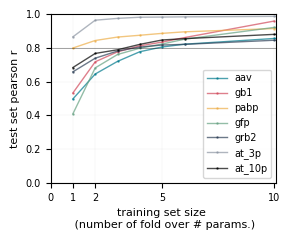

In [12]:

cmap = matplotlib.cm.get_cmap('Set3')#'Pastel1')#'tab10')
tot_n_plot = len(subs_f) +2 # to add 2 TA colors in
rgbas = [cmap(v/tot_n_plot) for v in range(tot_n_plot)]

discrete_cols = {
    "blue"   : "#00798c",
    "red"    : "#d1495b",
    "yellow" : "#edae49",
    "green"  : "#66a182",
    "navy"   : "#2e4057",
    "grey"   : "#8d96a3", 
    'black' : 'black'}

rgbas = list(discrete_cols.values())


plt.figure(figsize=(3,2.5))

l_alpha = 0.7
l_w = 1
l_ms = 1.5

x_plot_n = 'fold_data'

#plotting all the subsampling run on colab
for i,f in enumerate(subs_f):
    prot_n = f[len('subsampling_'):-4]
    df_subs = pd.read_csv(din + f, header=None, delimiter = '\t')
    df_subs = df_subs.set_axis(
        ['protein_n', 
         'fraction_training_data', 
         'num_train', 
         'num_params', 
         've_test', 
         'pearson_corr_test', 
         've_all', 
         'pearson_corr_all', 
         'it', 
         'lr', 
         'epochs'], axis=1, inplace=False)
    df_subs['fold_data'] = df_subs.num_train/df_subs.num_params
    df_mean_subs = df_subs.groupby('fold_data').mean()
    df_std_subs = df_subs.groupby('fold_data').mean()
    df_mean_subs

    plt.plot(df_mean_subs.index, df_mean_subs.pearson_corr_test, 
            label= prot_n,
            color=rgbas[i],
            lw=l_w,
            alpha = l_alpha,
            ms=l_ms,
            marker='.')

plt.legend(loc='lower right', fontsize=7)
plt.ylabel('test set pearson r', fontsize=8)
plt.ylim([0,1])
plt.yticks([0,0.2, 0.4,0.6,0.8,1], fontsize=7)
plt.grid(visible=True, alpha=0.3, lw=0.2)

if x_plot_n == 'fold_data':
    plt.xticks([0,1,2,5, 10], fontsize=7)
    plt.xlim(0,10.1)
    plt.xlabel('training set size \n (number of fold over # params.)', fontsize=8)


if x_plot_n == 'num_train':
    plt.xticks([0,2e3,5e3,1e4,1.3e4], fontsize=7)
    plt.xlim(0,1.3e4)
    plt.xlabel('n data', fontsize=8)

plt.axhline(y=0.8, color='black', lw=0.5,alpha=0.5)
plt.tight_layout()
plt.savefig(dout +'subsampling_fold_all_{}.svg'.format(x_plot_n), format='svg')
plt.savefig(dout +'subsampling_fold_all_{}.png'.format(x_plot_n), format='png', dpi=300)
plt.show()